# Computer Vision - Convolutional Neural Network

In [1]:
# Importing TF and checking the version
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
# Get data from https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
# import zipfile

# # Unzip the data
# zip_ref = zipfile.ZipFile("pizza_steak.zip")
# zip_ref.extractall()
# zip_ref.close()

## CNN Model - Multiclass Classification

### Familiarise with the data

In [3]:
# Walk through dataset directories
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data\test.
There are 0 directories and 250 images in 10_food_classes_all_data\test\chicken_curry.
There are 0 directories and 250 images in 10_food_classes_all_data\test\chicken_wings.
There are 0 directories and 250 images in 10_food_classes_all_data\test\fried_rice.
There are 0 directories and 250 images in 10_food_classes_all_data\test\grilled_salmon.
There are 0 directories and 250 images in 10_food_classes_all_data\test\hamburger.
There are 0 directories and 250 images in 10_food_classes_all_data\test\ice_cream.
There are 0 directories and 250 images in 10_food_classes_all_data\test\pizza.
There are 0 directories and 250 images in 10_food_classes_all_data\test\ramen.
There are 0 directories and 250 images in 10_food_classes_all_data\test\steak.
There are 0 directories and 250 images in 10_food_classes_all_data\test\sushi.
There are 10 directories and 0 ima

In [4]:
# Setting up train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [5]:
# Getting the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [6]:
# Function to visialise random images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")
    return img

Image shape: (512, 512, 3)


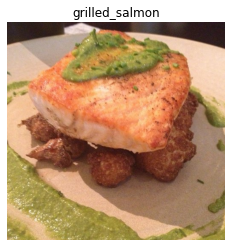

In [7]:
# Visualising random images
img = view_random_image(
    target_dir=train_dir,
    target_class=random.choice(class_names)
)

### Pre-processing the data

In [8]:
# Building image data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data and turn into batches
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Creating a baseline multiclass CNN model

In [13]:
# Create a new model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_mc1 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model_mc1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_mc1 = model_mc1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 547s 2s/step - loss: 2.1197 - accuracy: 0.2395 - val_loss: 1.9362 - val_accuracy: 0.3000
Epoch 2/5
235/235 [==============================] - ETA: 0s - loss: 1.8473 - accuracy: 0.3584

In [10]:
# Evaluate the model
model_mc1.evaluate(test_data)

79/79 [==============================] - 46s 575ms/step - loss: 3.6106 - accuracy: 0.2812


[3.6106221675872803, 0.28119999170303345]

In [9]:
# Plotting function for each metric
def plot_loss_curves(history):
    # Loss values
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    # Accuracy values
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    # Number of epochs
    epochs = range(len(history.history["loss"]))

    # Plot losses
    plt.plot(epochs, loss, label="Training_Loss")
    plt.plot(epochs, val_loss, label="Validation_Loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="Training_Accuracy")
    plt.plot(epochs, val_accuracy, label="Validation_Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

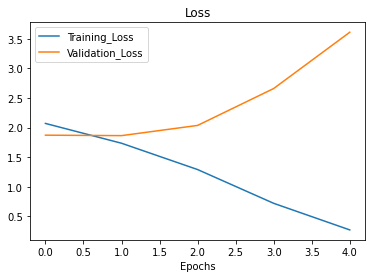

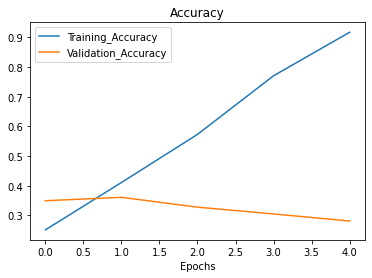

In [12]:
# Vislualising the loss curves
plot_loss_curves(history_mc1)

### Adjusting the hyperparameters

In [13]:
# Checking previous model details
model_mc1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

=================================

OPTION 1: reduce number of layers

=================================

In [15]:
# Creating a model
model_mc2 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model_mc2.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [16]:
# Model's summary
model_mc2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 29160)             0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [17]:
# Fit the model
history_mc2 = model_mc2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 215s 914ms/step - loss: 2.0976 - accuracy: 0.2476 - val_loss: 1.9283 - val_accuracy: 0.3164
Epoch 2/5
235/235 [==============================] - 81s 347ms/step - loss: 1.8036 - accuracy: 0.3848 - val_loss: 1.9027 - val_accuracy: 0.3312
Epoch 3/5
235/235 [==============================] - 81s 342ms/step - loss: 1.4808 - accuracy: 0.5157 - val_loss: 1.9591 - val_accuracy: 0.3448
Epoch 4/5
235/235 [==============================] - 125s 533ms/step - loss: 0.9473 - accuracy: 0.7028 - val_loss: 2.1790 - val_accuracy: 0.3176
Epoch 5/5
235/235 [==============================] - 160s 681ms/step - loss: 0.4708 - accuracy: 0.8681 - val_loss: 2.7080 - val_accuracy: 0.2952


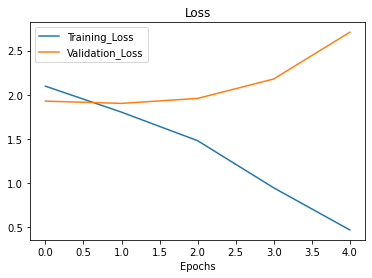

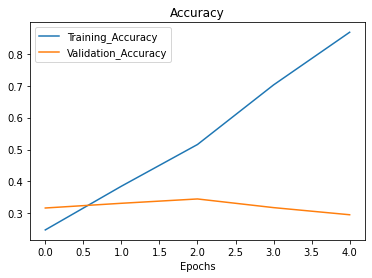

In [18]:
# Visualising the loss curves
plot_loss_curves(history_mc2)

=================================

OPTION 2: data augmentation

=================================

In [11]:
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

Found 7500 images belonging to 10 classes.


In [12]:
# Creating a new model to fit with augmented data
model_mc3 = tf.keras.models.clone_model(model_mc1)

# Compile the model
model_mc3.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_mc3 = model_mc3.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data)
)

NameError: name 'model_mc1' is not defined

In [22]:
# Model's details
model_mc3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

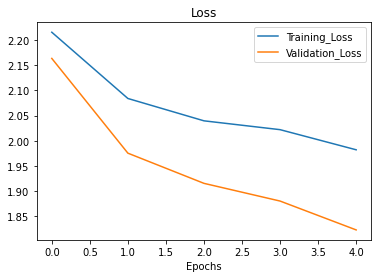

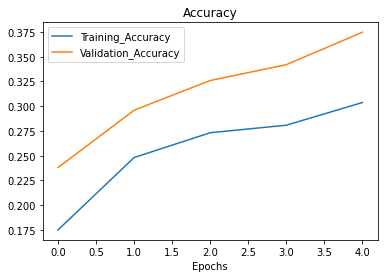

In [23]:
# Visualising the curves
plot_loss_curves(history_mc3)

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Saving the model
model_mc3.save("saved_model_mc3")

In [ ]:
# Loading trained model
loaded_model_mc3 = tf.keras.models.load_model("saved_model_mc3")